In [9]:
!pip install opencv-python==4.6.0
!sudo apt install tesseract-ocr
!pip install pytesseract==0.3.9

ERROR: Could not find a version that satisfies the requirement opencv-python==4.6.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80)
ERROR: No matching distribution found for opencv-python==4.6.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [10]:
!mkdir tessdata

!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

mkdir: cannot create directory ‘tessdata’: File exists
--2024-03-16 08:14:31--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2024-03-16 08:14:31--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2024-03-16 08:14:31--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [11]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-por is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [12]:
import pytesseract
from pytesseract import Output

import cv2
from google.colab.patches import cv2_imshow
from imutils import contours

import numpy as np
import re

In [13]:
def caixa_texto(resultado, img, cor = (255, 100, 0), ):
  x = resultado['left'][i]
  y = resultado['top'][i]
  w = resultado['width'][i]
  h = resultado['height'][i]

  cv2.rectangle(img, (x, y), (x+w, y+h), cor, 2)

  return x, y, img

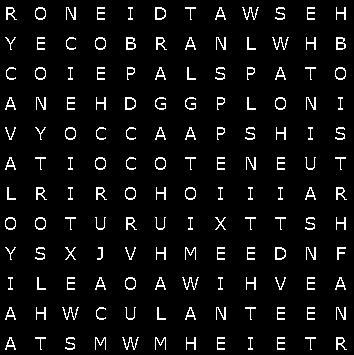

In [14]:
img = cv2.imread('/content/img/caca_palavra_02.PNG')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2_imshow(thresh)

In [15]:
config_tesseract = '--tessdata-dir tessdata --psm 6 --oem 2 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ'
osd = pytesseract.image_to_data(img, lang = 'eng', config = config_tesseract, output_type = Output.DICT)

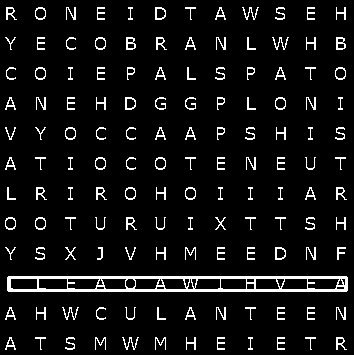

In [16]:
rgb_copy = thresh.copy()
n = len(osd['text'])
min_conf = 0

palavras = ['coruja', 'corvo', 'alga', 'peixe', 'cobra', 'dragao', 'leao', 'boi', 'gato', 'pato', 'cavalo']

for i in range(n):
  conf = int(osd['conf'][i])
  if conf > min_conf:
    texto = osd['text'][i].lower()
    for palavra in palavras:
      if (palavra in texto or palavra[::-1] in texto):
        x, y, rgb_copy = caixa_texto(osd, rgb_copy, cor = (255, 100, 0))
        #print(texto.index('elefante', 0, len(texto)))
cv2_imshow(rgb_copy)

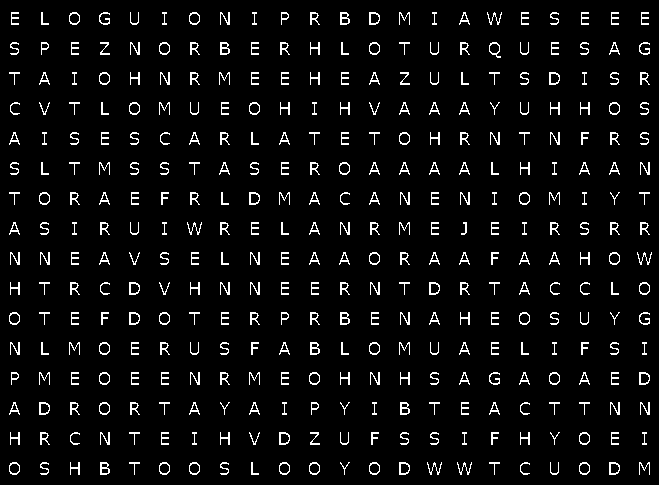

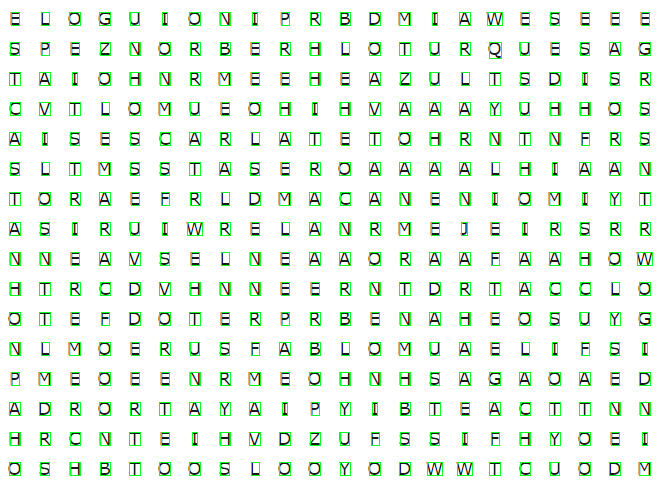

-1

In [42]:
# Load image, grayscale, Otsu's threshold
image = cv2.imread('/content/img/caca_palavra_06.PNG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(aux, black) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

thresh = cv2.threshold(black,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

#cv2_imshow(thresh)

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts, _ = contours.sort_contours(cnts, method="top-to-bottom")

linhas = []
box_linhas = []

config_tesseract = '--tessdata-dir tessdata --psm 10 --oem 2 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ'

ROI_number = 0
y_ant = 0
min_conf = 0
texto = []
box_texto = []

for c in cnts:

    area = cv2.contourArea(c)

    if area > 1:

        x,y,w,h = cv2.boundingRect(c)

        ROI = 255 - image[y-3:y+h+3, x-3:x+w+3]
        #cv2_imshow(ROI)
        ROI_afterd = cv2.resize(ROI, (ROI.shape[1]*3, ROI.shape[0]*3), interpolation=cv2.INTER_LANCZOS4)

        gray = cv2.cvtColor(ROI_afterd, cv2.COLOR_BGR2GRAY)
        sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        ROI_sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
        ROI_thresh = cv2.threshold(ROI_sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

        osd = pytesseract.image_to_data(ROI_thresh, lang = 'eng', config = config_tesseract, output_type = Output.DICT)

        letra = np.array(osd['text'])
        conf = np.array(osd['conf'])

        letra = list(letra[conf != '-1'])

        #print(osd)
        #print(letra)

        if ROI_number == 0:
            y_ant = y
            texto.append(letra[0])
            box_texto.append((x, y, h, w))
        elif y_ant == y:
            texto.append(letra[0])
            box_texto.append((x, y, h, w))
        else:
            y_ant = y
            linhas.append(texto)
            box_linhas.append(box_texto)

            texto = []
            box_texto = []

            texto.append(letra[0])
            box_texto.append((x, y, h, w))

        #print(y)
        cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI_afterd)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)

        ROI_number += 1

linhas.append(texto)
box_linhas.append(box_texto)

cv2_imshow(thresh)
cv2_imshow(image)
cv2.waitKey()

In [43]:
#palavras = ['coruja', 'corvo', 'alga', 'peixe', 'cobra', 'dragao', 'leao', 'boi', 'gato', 'pato', 'cavalo']
#palavras = ['alface', 'batata', 'beterraba', 'couve', 'espinafre', 'mandioca', 'maxixe',
#            'nabo', 'pimenta', 'pepino', 'rabanete', 'tomate']
#palavras = ['acerola', 'amora', 'abacate', 'banana', 'caju', 'figo', 'framboesa', 'goiaba',
#            'graviola', 'laranja', 'manga', 'morango']
palavras = ['azul', 'amarelo', 'branco', 'bronze', 'caramelo', 'carmin', 'castanho', 'creme', 'dourado', 'esmeralda',
           'escarlate', 'fuchsia', 'indigo', 'laranja', 'marrom', 'marfim', 'oliva', 'preto', 'turquesa', 'vermelho',
           'verde', 'violeta']


mat = np.row_stack(linhas)
horizontal = {}
vertical = {}

for e in enumerate(mat):

  letras = list(e[1])
  letras = ''.join(letras).lower()

  for palavra in palavras:

      if (palavra in letras):

        match=(re.search(palavra, letras))
        horizontal[palavra] = [e[0], True, match.span()]

      elif(palavra in letras[::-1]):

        match=(re.search(palavra, letras[::-1]))
        horizontal[palavra] = [e[0], False, match.span()]

for e in enumerate(mat.T):

  letras = list(e[1])
  letras = ''.join(letras).lower()

  for palavra in palavras:

    if (palavra in letras):

      match=(re.search(palavra, letras))
      vertical[palavra] = [e[0], False, match.span()]

    elif(palavra in letras[::-1]):

      match=(re.search(palavra, letras[::-1]))
      vertical[palavra] = [e[0], True, match.span()]

In [44]:
horizontal

{'bronze': [1, True, (14, 20)],
 'turquesa': [1, False, (13, 21)],
 'azul': [2, False, (12, 16)],
 'escarlate': [4, False, (3, 12)],
 'preto': [10, True, (12, 17)]}

In [45]:
vertical

{'indigo': [0, True, (1, 7)],
 'fuchsia': [2, True, (4, 11)],
 'carmin': [3, True, (6, 12)],
 'laranja': [6, False, (2, 9)],
 'branco': [10, True, (5, 11)],
 'caramelo': [18, True, (6, 14)],
 'creme': [19, True, (1, 6)],
 'oliva': [20, True, (9, 14)],
 'castanho': [21, False, (3, 11)]}

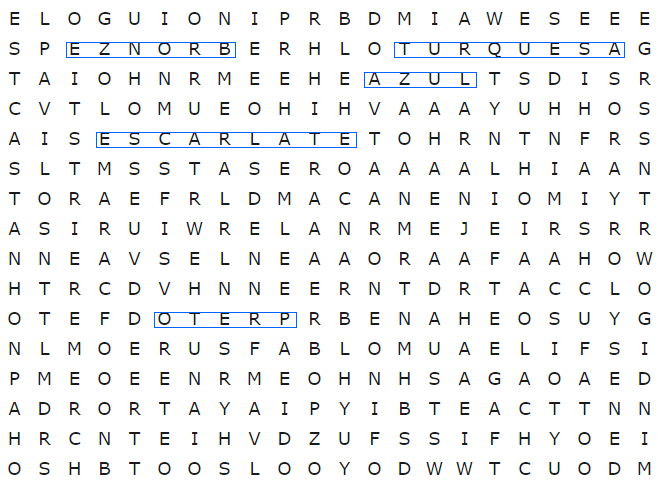

In [46]:
img_final = cv2.imread('/content/img/caca_palavra_06.PNG')

mat_box = np.stack(box_linhas, axis=0)
n = mat_box.shape[1]

for k in horizontal:

  indice = horizontal[k][0]
  invertido = horizontal[k][1]
  a = horizontal[k][2][0]
  b = horizontal[k][2][1]

  if(invertido):
    x = mat_box[indice][a][0]
    y = mat_box[indice][a][1]
    ponto_inicial = ((x, y))

    x = mat_box[indice][b-1][0]
    y = mat_box[indice][b-1][1]
    ponto_final = ((x, y))
  else: # substituir por flip 0
    x = mat_box[indice][n - b][0]
    y = mat_box[indice][n - b][1]
    ponto_inicial = ((x, y))

    x = mat_box[indice][n - a - 1][0]
    y = mat_box[indice][n - a - 1][1]
    ponto_final = ((x, y))

  cv2.rectangle(img_final, (ponto_inicial[0] + 15, ponto_inicial[1]), (ponto_final[0] - 5, ponto_final[1] + 15), (255,100,0), 1)
cv2_imshow(img_final)

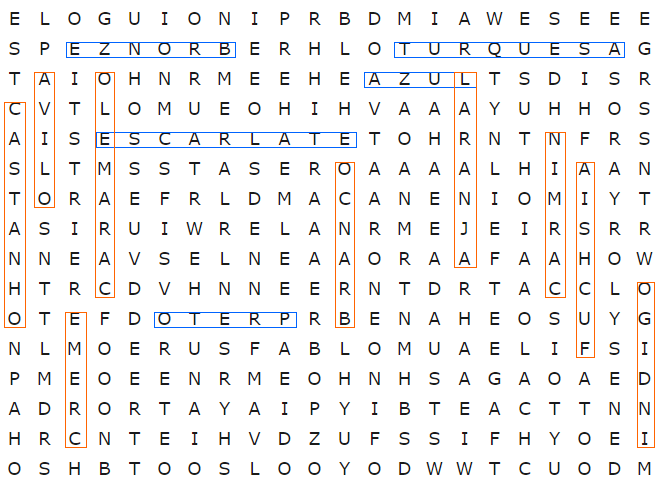

In [48]:
mat_box = np.stack(box_linhas, axis=1)
n = mat_box.shape[1]

for k in vertical:

   indice = vertical[k][0]
   invertido = vertical[k][1]
   a = vertical[k][2][0]
   b = vertical[k][2][1]

   if(not invertido):
    x = mat_box[indice][a][0]
    y = mat_box[indice][a][1]
    ponto_inicial = ((x, y))

    x = mat_box[indice][b-1][0]
    y = mat_box[indice][b-1][1]
    ponto_final = ((x, y))
   else:
    x = mat_box[indice][n - b][0]
    y = mat_box[indice][n - b][1]
    ponto_inicial = ((x, y))

    x = mat_box[indice][n - a - 1][0]
    y = mat_box[indice][n - a - 1][1]
    ponto_final = ((x, y))

   cv2.rectangle(img_final, (ponto_inicial[0] + 15, ponto_inicial[1]), (ponto_final[0] - 5, ponto_final[1] + 15), (0,100,255), 1)

cv2_imshow(img_final)

In [49]:
diagonal_primaria = {}
diagonal_secundaria = {}

mat_box = np.stack(box_linhas, axis=1)
diag1 = [mat[::-1,:].diagonal(i) for i in range(-mat.shape[0]+1,mat.shape[1])]
diag2 = [mat.diagonal(i) for i in range(mat.shape[1]-1,-mat.shape[0],-1)]

for e in enumerate(diag1):

  letras = list(e[1])
  letras = ''.join(letras).lower()

  for palavra in palavras:

      if (palavra in letras):
        match=(re.search(palavra, letras))
        diagonal_primaria[palavra] = [e[0], True, match.span()]

      elif(palavra in letras[::-1]):
        match=(re.search(palavra, letras[::-1]))
        diagonal_primaria[palavra] = [e[0], False, match.span()]

for e in enumerate(diag2):

  letras = list(e[1])
  letras = ''.join(letras).lower()

  for palavra in palavras:

      if (palavra in letras):
        match=(re.search(palavra, letras))
        diagonal_secundaria[palavra] = [e[0], False, match.span()]

      elif(palavra in letras[::-1]):
        match=(re.search(palavra, letras[::-1]))
        diagonal_secundaria[palavra] = [e[0], True, match.span()]

In [50]:
diagonal_primaria

{'amarelo': [15, False, (6, 13)],
 'esmeralda': [19, True, (2, 11)],
 'dourado': [26, False, (4, 11)]}

In [51]:
diagonal_secundaria

{'verde': [14, True, (5, 10)],
 'vermelho': [15, False, (3, 11)],
 'marrom': [20, True, (3, 9)],
 'violeta': [22, True, (1, 8)],
 'marfim': [24, True, (4, 10)]}

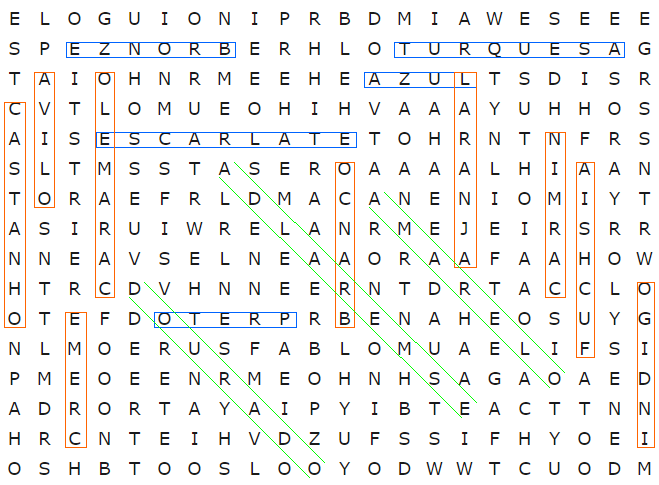

In [52]:
#img_final = cv2.imread('/content/img/caca_palavra_05.PNG')
mat_box = np.stack(box_linhas, axis=1)
diag_box = [mat_box[::-1,:].diagonal(i) for i in range(-mat_box.shape[0]+1,mat_box.shape[1])]

for k in diagonal_primaria:

   indice = diagonal_primaria[k][0]
   invertido = diagonal_primaria[k][1]
   a = diagonal_primaria[k][2][0]
   b = diagonal_primaria[k][2][1]

   if(not invertido):
    x = diag_box[indice][:, a][0]
    y = diag_box[indice][:, a][1]
    ponto_inicial = ((x, y))

    x = diag_box[indice][:, b-1][0]
    y = diag_box[indice][:, b-1][1]
    ponto_final = ((x, y))
   else:
    diag_flip = np.flip(diag_box[indice], 1)
    x = diag_flip[:, a][0]
    y = diag_flip[:, a][1]
    ponto_inicial = ((x, y))

    x = diag_flip[:, b-1][0]
    y = diag_flip[:, b-1][1]
    ponto_final = ((x, y))

   cv2.line(img_final, (ponto_inicial[0] + 15, ponto_inicial[1]), (ponto_final[0] + 15, ponto_final[1]), (0,255,0), 1)
   cv2.line(img_final, (ponto_inicial[0], ponto_inicial[1] + 15), (ponto_final[0], ponto_final[1] + 15), (0,255,0), 1)

cv2_imshow(img_final)

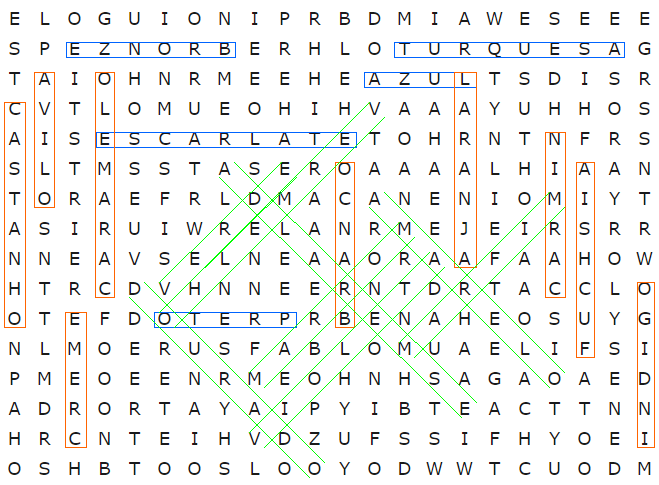

In [53]:
mat_box = np.stack(box_linhas, axis=0)
diag_box = [mat_box.diagonal(i) for i in range(mat_box.shape[1]-1,-mat_box.shape[0],-1)]

for k in diagonal_secundaria:

   indice = diagonal_secundaria[k][0]
   invertido = diagonal_secundaria[k][1]
   a = diagonal_secundaria[k][2][0]
   b = diagonal_secundaria[k][2][1]

   if(not invertido):
    x = diag_box[indice][:, a][0]
    y = diag_box[indice][:, a][1]
    ponto_inicial = ((x, y))

    x = diag_box[indice][:, b-1][0]
    y = diag_box[indice][:, b-1][1]
    ponto_final = ((x, y))
   else:
    diag_flip = np.flip(diag_box[indice], 1)
    x = diag_flip[:, a][0]
    y = diag_flip[:, a][1]
    ponto_inicial = ((x, y))

    x = diag_flip[:, b-1][0]
    y = diag_flip[:, b-1][1]
    ponto_final = ((x, y))

   cv2.line(img_final, (ponto_inicial[0], ponto_inicial[1]), (ponto_final[0], ponto_final[1]), (0,255,0), 1)
   cv2.line(img_final, (ponto_inicial[0] + 15, ponto_inicial[1] + 15), (ponto_final[0] + 15, ponto_final[1] + 15), (0,255,0), 1)

cv2_imshow(img_final)

In [ ]:
a = np.stack(linhas, axis=0)
diag_primaria = [a[::-1,:].diagonal(i) for i in range(-a.shape[0]+1,a.shape[1])]
diag_secundaria = [a.diagonal(i) for i in range(a.shape[1]-1,-a.shape[0],-1)]
print([n.tolist() for n in diag_primaria])
print([n.tolist() for n in diag_secundaria])

for e in enumerate(diag_secundaria):
  letras = list(e[1])
  letras = ''.join(letras).lower()
  print(letras)

[['E'], ['T', 'S'], ['R', 'L', 'N'], ['E', 'C', 'O', 'A'], ['K', 'A', 'M', 'I', 'D'], ['N', 'S', 'T', 'R', 'Y', 'E'], ['U', 'T', 'B', 'A', 'D', 'T', 'C'], ['S', 'C', 'P', 'K', 'T', 'H', 'R', 'A'], ['N', 'C', 'D', 'A', 'X', 'A', 'T', 'D', 'F'], ['E', 'L', 'E', 'I', 'A', 'O', 'B', 'U', 'T', 'L'], ['U', 'V', 'R', 'O', 'N', 'I', 'P', 'E', 'P', 'P', 'A'], ['E', 'F', 'U', 'M', 'N', 'T', 'M', 'D', 'O', 'I', 'R', 'O'], ['N', 'I', 'O', 'A', 'E', 'X', 'E', 'R', 'M', 'T', 'A'], ['T', 'R', 'C', 'A', 'O', 'A', 'E', 'E', 'M', 'A'], ['A', 'V', 'R', 'T', 'E', 'H', 'N', 'A', 'T'], ['B', 'G', 'F', 'O', 'T', 'T', 'N', 'N'], ['A', 'E', 'E', 'W', 'A', 'D', 'N'], ['R', 'R', 'T', 'E', 'I', 'S'], ['R', 'Y', 'T', 'O', 'N'], ['E', 'D', 'C', 'A'], ['T', 'A', 'B'], ['E', 'O'], ['B']]
[['O'], ['A', 'A'], ['L', 'R', 'A'], ['F', 'P', 'T', 'T'], ['A', 'T', 'I', 'M', 'N'], ['C', 'D', 'P', 'M', 'A', 'N'], ['E', 'R', 'U', 'O', 'E', 'N', 'S'], ['D', 'T', 'T', 'E', 'R', 'N', 'D', 'N'], ['A', 'Y', 'H', 'B', 'D', 'E', 'T', 

In [ ]:
np.stack(linhas, axis=0)

array([['E', 'S', 'N', 'A', 'D', 'E', 'C', 'A', 'F', 'L', 'A', 'O'],
       ['T', 'L', 'O', 'I', 'Y', 'T', 'R', 'D', 'T', 'P', 'R', 'A'],
       ['R', 'C', 'M', 'R', 'D', 'H', 'T', 'U', 'P', 'I', 'T', 'A'],
       ['E', 'A', 'T', 'A', 'T', 'A', 'B', 'E', 'O', 'M', 'M', 'T'],
       ['K', 'S', 'B', 'K', 'X', 'O', 'P', 'D', 'R', 'E', 'A', 'N'],
       ['N', 'T', 'P', 'A', 'A', 'I', 'M', 'E', 'E', 'N', 'N', 'N'],
       ['U', 'C', 'D', 'I', 'N', 'T', 'X', 'A', 'H', 'T', 'D', 'S'],
       ['S', 'C', 'E', 'O', 'N', 'E', 'O', 'E', 'T', 'A', 'I', 'N'],
       ['N', 'L', 'R', 'M', 'A', 'A', 'T', 'O', 'W', 'E', 'O', 'A'],
       ['E', 'V', 'U', 'O', 'C', 'R', 'F', 'E', 'T', 'T', 'C', 'B'],
       ['U', 'F', 'I', 'R', 'V', 'G', 'E', 'R', 'Y', 'D', 'A', 'O'],
       ['E', 'N', 'T', 'A', 'B', 'A', 'R', 'R', 'E', 'T', 'E', 'B']],
      dtype='<U1')

In [ ]:
# Load image, grayscale, Otsu's threshold
image = cv2.imread('/content/img/caca_palavra_02.PNG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(aux, black) = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(black)

thresh = cv2.threshold(black,0,255,cv2.THRESH_OTSU + cv2.THRESH_BINARY)[1]

cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts, _ = contours.sort_contours(cnts, method="top-to-bottom")

linhas = []

config_tesseract = '--tessdata-dir tessdata --psm 10 --oem 2 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ'

ROI_number = 0
y_ant = 0
min_conf = 0
texto = []

for c in cnts:

    area = cv2.contourArea(c)

    if area > 1:

        x,y,w,h = cv2.boundingRect(c)

        ROI = 255 - image[y-3:y+h+3, x-3:x+w+3]
        ROI_afterd = cv2.resize(ROI, (ROI.shape[1]*3, ROI.shape[0]*3), interpolation=cv2.INTER_LANCZOS4)

        gray = cv2.cvtColor(ROI_afterd, cv2.COLOR_BGR2GRAY)
        sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        ROI_sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
        ROI_thresh = cv2.threshold(ROI_sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

        osd = pytesseract.image_to_data(ROI_thresh, lang = 'eng', config = config_tesseract, output_type = Output.DICT)

        letra = np.array(osd['text'])
        conf = np.array(osd['conf'])

        letra = list(letra[conf != '-1'])

        #print(osd)
        #print(letra)

        if ROI_number == 0:
            y_ant = y
            texto.append(letra[0])
        elif y_ant == y:
            texto.append(letra[0])
        else:
            y_ant = y
            linhas.append(texto)
            texto = []
            texto.append(letra[0])
        #print(y)
        cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI_afterd)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 1)

        ROI_number += 1

linhas.append(texto)
cv2_imshow(thresh)
cv2_imshow(image)
cv2.waitKey()

linhas

In [ ]:
for c in cnts[0:1]:
  print(c)
  print('\n')

[[[336   7]]

 [[336  19]]

 [[336  14]]

 [[337  13]]

 [[343  13]]

 [[344  14]]

 [[344  19]]

 [[345  19]]

 [[345   7]]

 [[344   7]]

 [[344  11]]

 [[343  12]]

 [[337  12]]

 [[336  11]]]




In [ ]:
for r in mat.T:
  r = list(r)
  r_str = ''.join(r).lower()
  for palavra in palavras:
      if (palavra in r_str or palavra[::-1] in r_str):
        print((palavra, r_str))

In [ ]:
mat = np.row_stack(linhas)
for e in enumerate(mat.T):
  print(e[0], e[1])

0 ['H' 'B' 'O' 'I' 'S' 'T' 'R' 'H' 'F' 'A' 'N' 'R']
1 ['E' 'H' 'T' 'N' 'I' 'U' 'A' 'S' 'N' 'E' 'E' 'T']
2 ['S' 'W' 'A' 'O' 'H' 'E' 'I' 'T' 'D' 'V' 'E' 'E']
3 ['W' 'L' 'P' 'L' 'S' 'N' 'I' 'T' 'E' 'H' 'T' 'I']
4 ['A' 'N' 'S' 'P' 'P' 'E' 'I' 'X' 'E' 'I' 'N' 'E']
5 ['T' 'A' 'L' 'G' 'A' 'T' 'O' 'I' 'M' 'W' 'A' 'H']
6 ['D' 'R' 'A' 'G' 'A' 'O' 'H' 'U' 'H' 'A' 'L' 'M']
7 ['I' 'B' 'P' 'D' 'C' 'C' 'O' 'R' 'V' 'O' 'U' 'W']
8 ['E' 'O' 'E' 'H' 'C' 'O' 'R' 'U' 'J' 'A' 'C' 'M']
9 ['N' 'C' 'I' 'E' 'O' 'I' 'I' 'T' 'X' 'E' 'W' 'S']
10 ['O' 'E' 'O' 'N' 'Y' 'T' 'R' 'O' 'S' 'L' 'H' 'T']
11 ['R' 'Y' 'C' 'A' 'V' 'A' 'L' 'O' 'Y' 'I' 'A' 'A']


In [ ]:
mat = np.hstack(linhas)
mat.shape

(144,)

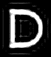

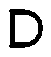

{'level': [1, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1],
 'left': [0, 9, 9, 9, 9],
 'top': [0, 9, 9, 9, 9],
 'width': [51, 34, 34, 34, 34],
 'height': [57, 39, 39, 39, 39],
 'conf': ['-1', '-1', '-1', '-1', 96],
 'text': ['', '', '', '', 'D']}

In [ ]:
roi_img = cv2.imread('/content/ROI_6.png')
gray = cv2.cvtColor(roi_img, cv2.COLOR_BGR2GRAY)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(gray, -1, sharpen_kernel)
thresh = cv2.threshold(sharpen, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

cv2_imshow(sharpen)
cv2_imshow(thresh)
cv2.waitKey()

pytesseract.image_to_data(thresh, lang = 'eng', config = config_tesseract, output_type = Output.DICT)

In [ ]:
for l in linhas:
  print(len(l))

16
16
18
15
16
15
16
15
15
15
16
15
16
15
